In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Lab 6

For the LHC data, let us fake a background with a Poisson distribution of mean 100.

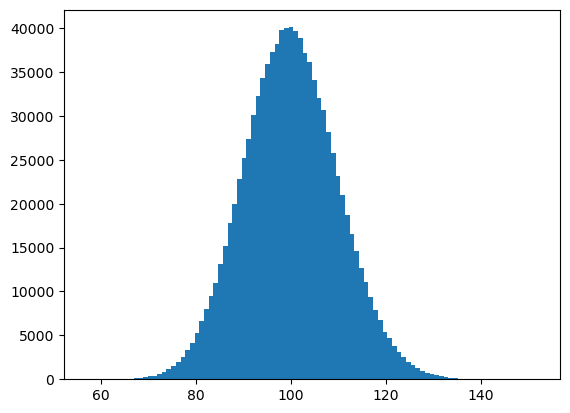

In [13]:
bkgd = stats.poisson.rvs(100, size = 1000000)
plt.hist(bkgd, bins = max(bkgd) - min(bkgd) + 1);

## Problem 1

In [15]:
probability = stats.norm.cdf(5)
stats.poisson.ppf(probability, mu = 100)

154.0

## Problem 2